Social Network Analysis

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
print(nx.__version__)

3.2.1


In [3]:
#Fetching data
file_path = './';
ed = pd.read_csv(file_path + 'edges.csv') # Edges


In [4]:
nd = pd.read_csv(file_path + 'nodes.csv') # Nodes

In [5]:

hn = pd.read_csv(file_path + 'hero-network.csv') # Hero

In [6]:
#Data Exploration
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574467 entries, 0 to 574466
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   574467 non-null  object
 1   hero2   574467 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


In [7]:
#Data description
hn.describe()

,hero1,hero2
count,574467,574467
unique,6211,6173
top,CAPTAIN AMERICA,CAPTAIN AMERICA
freq,8149,8350


In [8]:
#Data cleaning
hn= hn.iloc[:10000,:2]
hn.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [9]:
subset = hn[hn['hero1'].isin([ 'BUCKY/BUCKY BARNES', 'VISION ','CAPTAIN AMERICA'])]
G = nx.Graph()
G = nx.from_pandas_edgelist(subset, source='hero1', target='hero2')
G.nodes['VISION ']['group']=1
G.nodes['CAPTAIN AMERICA']['group']=2
G.nodes['BUCKY/BUCKY BARNES']['group']=3
G.nodes['CAPTAIN AMERICA']['size']=40
G.nodes['BUCKY/BUCKY BARNES']['size']=40
G.nodes['VISION ']['size']=40

centrality_comic = nx.degree_centrality(G)
centrality_df_comic = pd.DataFrame(sorted(centrality_comic.items(), key=lambda x:x[1], reverse=True), columns=['Comic', 'Degree Centrality'])
print(centrality_df_comic.head())


                  Comic  Degree Centrality
0       CAPTAIN AMERICA           0.918033
1               VISION            0.229508
2    BUCKY/BUCKY BARNES           0.090164
3  WONDER MAN/SIMON WIL           0.016393
4  SHE-HULK/JENNIFER WA           0.016393


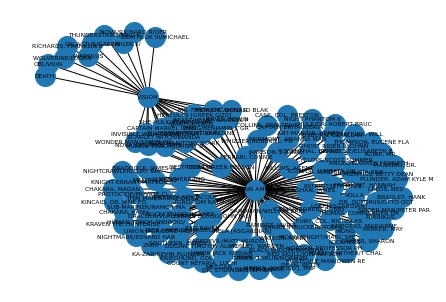

In [10]:
nx.draw(G, with_labels=True, font_size=6, node_size=400)

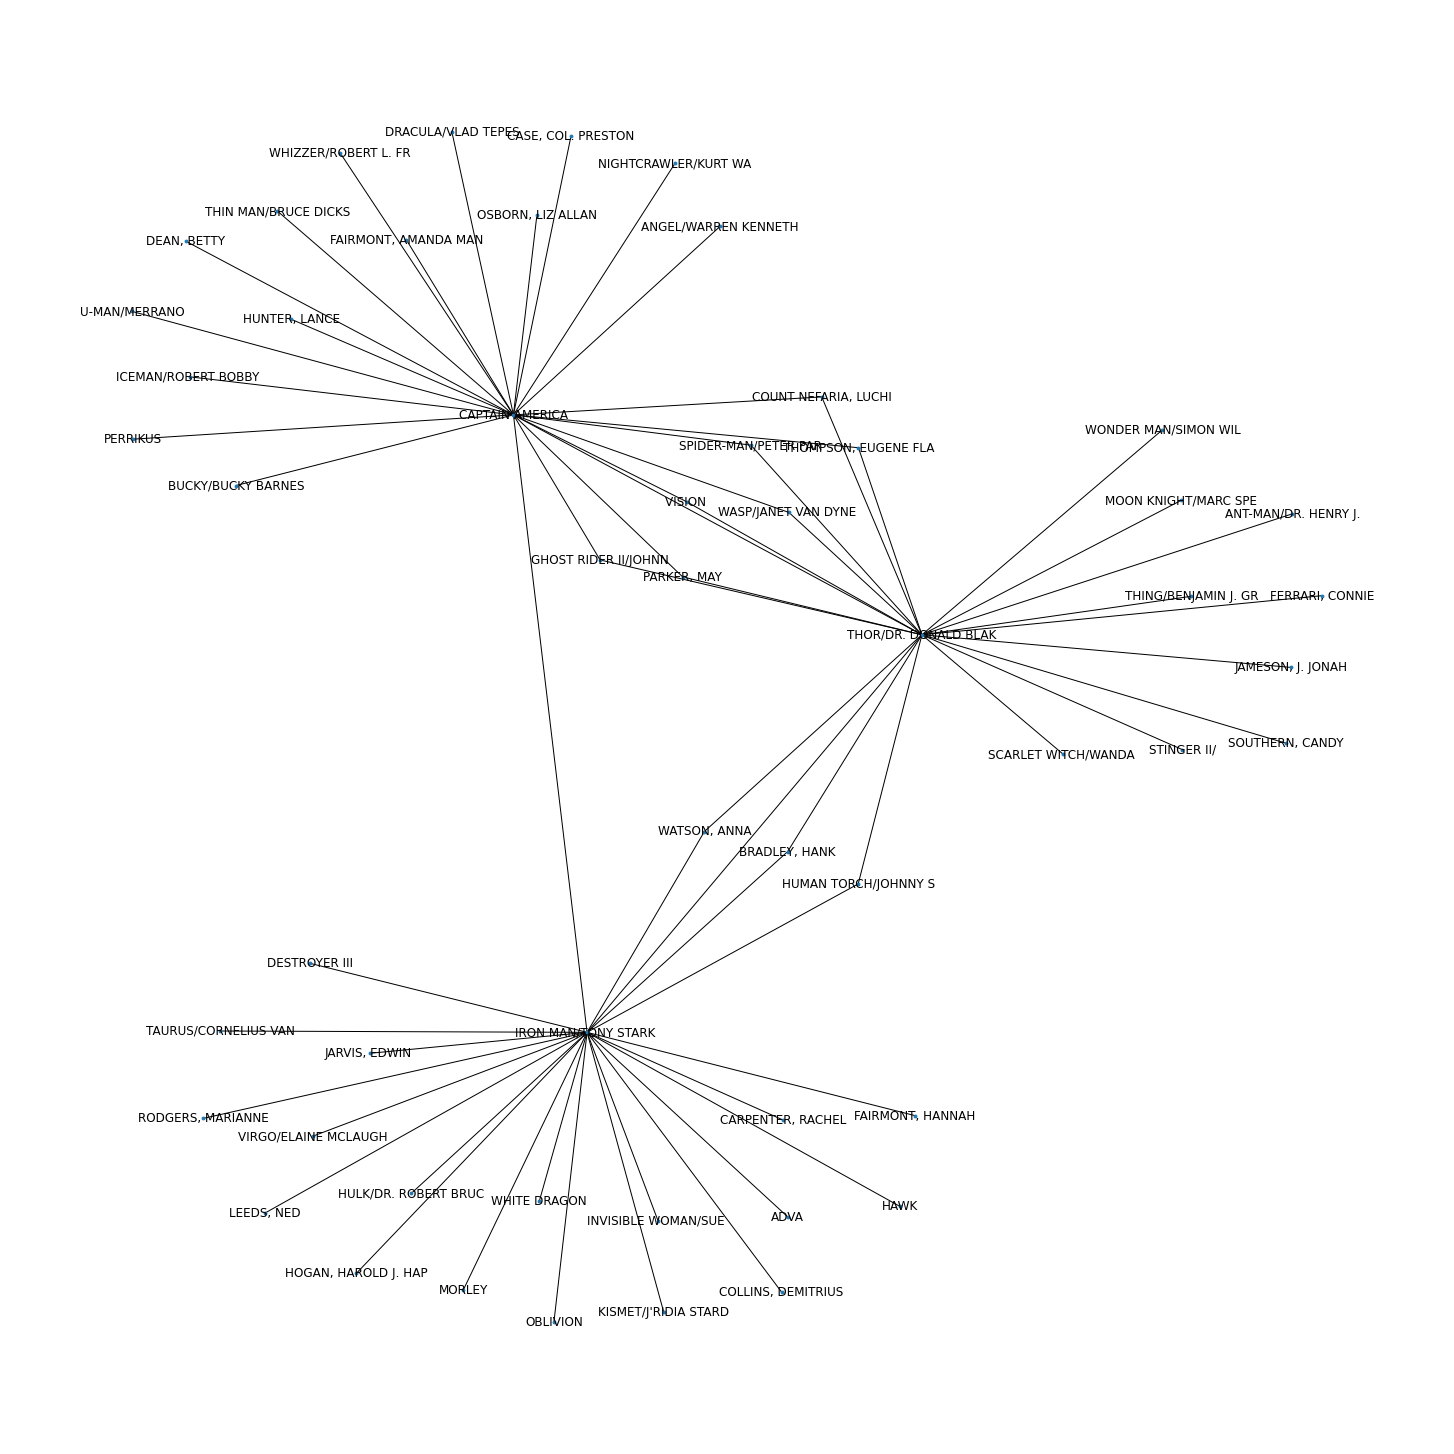

In [11]:
Thor = hn[hn['hero1']=='THOR/DR. DONALD BLAK'].sample(25)
Cap = Subset = hn[hn['hero1']=='CAPTAIN AMERICA'].sample(25)
IronMan = hn[hn['hero1'].str.contains('IRON MAN/TONY STARK')].sample(25)

Subset = pd.concat([Thor,Cap,IronMan],axis = 0)

G=nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize = (20,20))
nx.draw(G, with_labels=True, node_size = 8)
plt.show()

In [12]:
list(G.neighbors('CAPTAIN AMERICA'))

['THOR/DR. DONALD BLAK',
 'ANGEL/WARREN KENNETH',
 'IRON MAN/TONY STARK ',
 'COUNT NEFARIA, LUCHI',
 'SPIDER-MAN/PETER PAR',
 'VISION ',
 'U-MAN/MERRANO',
 'HUNTER, LANCE',
 'PARKER, MAY',
 'BUCKY/BUCKY BARNES',
 'THIN MAN/BRUCE DICKS',
 'FAIRMONT, AMANDA MAN',
 'OSBORN, LIZ ALLAN',
 'DRACULA/VLAD TEPES',
 'PERRIKUS',
 'WASP/JANET VAN DYNE ',
 'NIGHTCRAWLER/KURT WA',
 'ICEMAN/ROBERT BOBBY ',
 'DEAN, BETTY',
 'GHOST RIDER II/JOHNN',
 'THOMPSON, EUGENE FLA',
 'WHIZZER/ROBERT L. FR',
 'CASE, COL. PRESTON']

In [13]:
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
[str(x) + '----' + str(y) for x,y in zip(G.nodes(),degrees)]

['THOR/DR. DONALD BLAK----21',
 'MOON KNIGHT/MARC SPE----1',
 'SOUTHERN, CANDY----1',
 'BRADLEY, HANK----2',
 'JAMESON, J. JONAH----1',
 'IRON MAN/TONY STARK ----23',
 'HUMAN TORCH/JOHNNY S----2',
 'WATSON, ANNA----2',
 'SCARLET WITCH/WANDA ----1',
 'THOMPSON, EUGENE FLA----2',
 'COUNT NEFARIA, LUCHI----2',
 'ANT-MAN/DR. HENRY J.----1',
 'SPIDER-MAN/PETER PAR----2',
 'VISION ----2',
 'THING/BENJAMIN J. GR----1',
 'WASP/JANET VAN DYNE ----2',
 'WONDER MAN/SIMON WIL----1',
 'FERRARI, CONNIE----1',
 'GHOST RIDER II/JOHNN----2',
 'PARKER, MAY----2',
 'CAPTAIN AMERICA----23',
 'STINGER II/----1',
 'ANGEL/WARREN KENNETH----1',
 'U-MAN/MERRANO----1',
 'HUNTER, LANCE----1',
 'BUCKY/BUCKY BARNES----1',
 'THIN MAN/BRUCE DICKS----1',
 'FAIRMONT, AMANDA MAN----1',
 'OSBORN, LIZ ALLAN----1',
 'DRACULA/VLAD TEPES----1',
 'PERRIKUS----1',
 'NIGHTCRAWLER/KURT WA----1',
 'ICEMAN/ROBERT BOBBY ----1',
 'DEAN, BETTY----1',
 'WHIZZER/ROBERT L. FR----1',
 'CASE, COL. PRESTON----1',
 'COLLINS, DEMITRIUS----1

In [14]:
#Creating a graph
G = nx.Graph()
G = nx.from_pandas_edgelist(hn, 'hero1', 'hero2')
# nx.draw(G)

In [15]:
print("Number of Nodes:", G.number_of_nodes())
print("Number of Edges:", G.number_of_edges())

Number of Nodes: 674
Number of Edges: 6255


In [16]:
#Find connected components
components = list(nx.connected_components(G))

#List the connected components
for i, component in enumerate(components, 1):
    print(f"Component {i}: {component}")

Component 1: {'OGRE', "S'YM", 'SERGEI', 'RESTON, CLIVE', "SHANNA/SHANNA O'HARA", 'FORTUNE, DOMINIC', 'RONAN THE ACCUSER [K', 'HEATER DELIGHT', 'WILSON, JIM', 'LOCKJAW [INHUMAN]', 'KRONOS', 'BLACK RACER/', 'BLUE DIAMOND/PROFESS', 'STACY, GWEN (CLONE)', 'MOLECULE MAN/OWEN RE', 'TOWER, BLAKE', 'MASTER MOLD III', 'CLEOPATRA', 'MOLE MAN/HARVEY RUPE', 'ANELLE', 'STINGER II/', 'CAGE, LUKE/CARL LUCA', 'ZELDA', 'KUKULCAN/VIRAKO/QUET', 'MODRED THE MYSTIC', 'BEAUTY', 'GUARDIAN IV', 'MINERVA [KREE]', 'WONDER MAN/SIMON WIL', 'ROSS, GEN. THADDEUS ', 'DESTINY II/IRENE ADL', 'MANIPULATOR/', 'KLAW/ULYSSES KLAW', 'PORCUPINE/ALEX GENTR', 'FER DE LANCE/TERESA', 'SPIDERCIDE', 'ALRAUNE, MARLENE', 'HOGAN, HAROLD J. HAP', 'JAKAR', 'ANDROMEDA/ANDROMEDA ', 'KINGSLEY, DANIEL', 'TARANTULA/ANTON MIGU', 'HYBRID/JAMES JIMMY M', 'LOCUST', 'LANDERS, GENA', 'JACKSON, STEVE', 'LUCIFER', 'SPIDER-MAN CLONE/BEN', 'KAUR, BENAZIR', 'COPPERHEAD III/DAVIS', 'RHINO', 'BI-BEAST II', 'ARISHEM [CELESTIAL]', 'NIGHTHAWK II/KYLE RI',

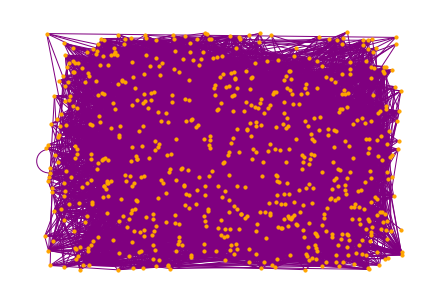

In [17]:
#Visualize the graph
ps = nx.random_layout(G)
nx.draw(G, ps, with_labels=False, node_size=10, node_color='orange', edge_color='purple')
plt.show()

In [18]:
#Find the diameter
try:
  diameter = nx.diameter(G, e=None, weight=None)
  print("Diameter of the graph:", diameter)
except nx.NetworkXError as e:
  print("Infinite length path")

Infinite length path


In [19]:
clustering_coefficients = nx.clustering(G)

# Print clustering coefficient for each node
for node, cc in clustering_coefficients.items():
    print(f"Node {node}: Clustering Coefficient = {cc}")

# Calculate average clustering coefficient for the whole graph
average_clustering_coefficient = nx.average_clustering(G)
print("Average Clustering Coefficient:", average_clustering_coefficient)

Node LITTLE, ABNER: Clustering Coefficient = 1.0
Node PRINCESS ZANDA: Clustering Coefficient = 1.0
Node BLACK PANTHER/T'CHAL: Clustering Coefficient = 0.4826388888888889
Node STEELE, SIMON/WOLFGA: Clustering Coefficient = 1.0
Node FORTUNE, DOMINIC: Clustering Coefficient = 1.0
Node ERWIN, CLYTEMNESTRA: Clustering Coefficient = 0.45666666666666667
Node IRON MAN/TONY STARK : Clustering Coefficient = 0.15367249858905105
Node IRON MAN IV/JAMES R.: Clustering Coefficient = 0.1557377049180328
Node RAVEN, SABBATH II/EL: Clustering Coefficient = 1.0
Node CARNIVORE/COUNT ANDR: Clustering Coefficient = 1.0
Node GHOST: Clustering Coefficient = 1.0
Node ZIMMER, ABE: Clustering Coefficient = 1.0
Node FU MANCHU: Clustering Coefficient = 1.0
Node TARR, BLACK JACK: Clustering Coefficient = 0.7333333333333333
Node SMITH, SIR DENIS NAY: Clustering Coefficient = 0.7333333333333333
Node SHANG-CHI: Clustering Coefficient = 0.7333333333333333
Node STARSHINE II/BRANDY : Clustering Coefficient = 0.48484848484

In [20]:
node_degrees = dict(G.degree())

min_ = node_degrees[min(node_degrees, key=node_degrees.get)]
max_ = node_degrees[max(node_degrees, key=node_degrees.get)]
for node, degree in node_degrees.items():
    print(f"Node {node}: Degree = {degree}")

print(f"Node {min(node_degrees, key=node_degrees.get)} has maximum degree {max_} & Node {min(node_degrees, key=node_degrees.get)} has minimum = {min_}")

Node LITTLE, ABNER: Degree = 3
Node PRINCESS ZANDA: Degree = 3
Node BLACK PANTHER/T'CHAL: Degree = 64
Node STEELE, SIMON/WOLFGA: Degree = 5
Node FORTUNE, DOMINIC: Degree = 5
Node ERWIN, CLYTEMNESTRA: Degree = 25
Node IRON MAN/TONY STARK : Degree = 158
Node IRON MAN IV/JAMES R.: Degree = 61
Node RAVEN, SABBATH II/EL: Degree = 5
Node CARNIVORE/COUNT ANDR: Degree = 3
Node GHOST: Degree = 3
Node ZIMMER, ABE: Degree = 3
Node FU MANCHU: Degree = 4
Node TARR, BLACK JACK: Degree = 10
Node SMITH, SIR DENIS NAY: Degree = 10
Node SHANG-CHI: Degree = 10
Node STARSHINE II/BRANDY : Degree = 22
Node ROM, SPACEKNIGHT: Degree = 26
Node MAN-THING/THEODORE T: Degree = 4
Node WU, LEIKO: Degree = 8
Node DOCTOR DREDD: Degree = 8
Node RESTON, CLIVE: Degree = 8
Node JACKSON, STEVE: Degree = 20
Node MYSTIQUE/RAVEN DARKH: Degree = 14
Node BLOB/FRED J. DUKES: Degree = 17
Node TORPEDO III/BROCK JO: Degree = 17
Node PYRO/ALLERDYCE JOHNN: Degree = 8
Node AVALANCHE/DOMINIC PE: Degree = 8
Node ROGUE /: Degree = 58
No

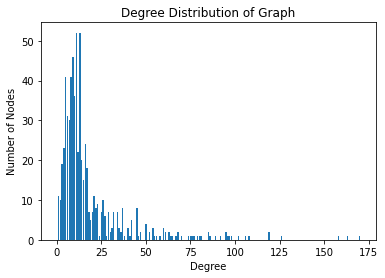

In [21]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Calculate the degree distribution
degree_counts = nx.degree_histogram(G)

# Plot the degree distribution
plt.bar(range(len(degree_counts)), degree_counts, align='center')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution of Graph')
plt.show()

In [22]:
#Degree Centrality
MF = nx.degree_centrality(G)
counter = 0
for w in sorted(MF, key = MF.get , reverse = True):
    counter = counter + 1
    if counter == 10:
        break
    print(w,'{:0.2f}'.format(MF[w]))

CAPTAIN AMERICA 0.25
SPIDER-MAN/PETER PAR 0.24
IRON MAN/TONY STARK  0.23
BEAST/HENRY &HANK& P 0.19
ANGEL/WARREN KENNETH 0.18
CYCLOPS/SCOTT SUMMER 0.18
HULK/DR. ROBERT BRUC 0.16
MARVEL GIRL/JEAN GRE 0.16
THING/BENJAMIN J. GR 0.15


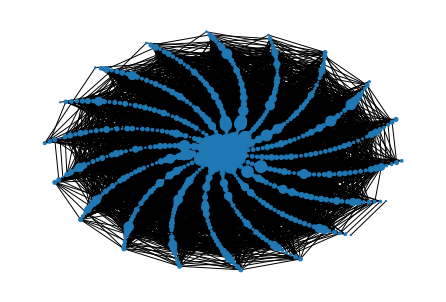

In [23]:
#Visualize the graph with node sizes based on degree centrality
node_sizes = [1000 * MF[node] for node in G.nodes]
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels=False, node_size=node_sizes, cmap=plt.cm.Blues)
plt.show()

In [24]:
#Betweeness_Centrality
BC = nx.betweenness_centrality(G)
counter = 0
for w in sorted(BC, key =BC.get,  reverse = True):
    counter = counter + 1
    if counter == 10:
        break
    print(w,"{:0.4f}".format(BC[w]))

CAPTAIN AMERICA 0.1442
IRON MAN/TONY STARK  0.1432
SPIDER-MAN/PETER PAR 0.1171
DR. STRANGE/STEPHEN  0.0822
HULK/DR. ROBERT BRUC 0.0618
SUB-MARINER/NAMOR MA 0.0574
MOONDRAGON/HEATHER D 0.0477
BEAST/HENRY &HANK& P 0.0446
CYCLOPS/SCOTT SUMMER 0.0435


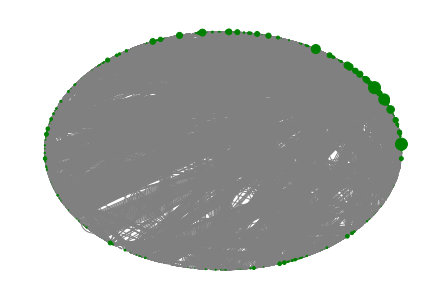

In [25]:
#Visualize the graph with node sizes based on betweeness centrality
node_sizes = [1000 * BC[node] for node in G.nodes]
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color='green', edge_color='gray')
plt.show()

In [26]:
#Closeness_Centrality
CC = nx.closeness_centrality(G)
counter = 0
for w in sorted(CC, key =CC.get,  reverse = True):
    counter = counter + 1
    if counter == 10:
        break
    print(w,"{:0.4f}".format(CC[w]))

CAPTAIN AMERICA 0.5292
IRON MAN/TONY STARK  0.5214
BEAST/HENRY &HANK& P 0.5123
ANGEL/WARREN KENNETH 0.5074
CYCLOPS/SCOTT SUMMER 0.4991
HULK/DR. ROBERT BRUC 0.4945
MARVEL GIRL/JEAN GRE 0.4937
ICEMAN/ROBERT BOBBY  0.4937
SPIDER-MAN/PETER PAR 0.4922


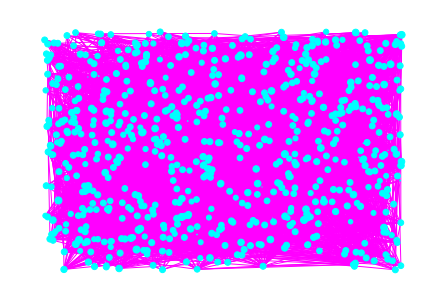

In [27]:
#Visualize the graph with node sizes based on closeness centrality
node_sizes = [100 * CC[node] for node in G.nodes]
pos = nx.random_layout(G)
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color='cyan', edge_color='magenta')
plt.show()

In [28]:
import random
def simulate_diffusion_ICM(G, p):
  #All nodes as uninformed
  node_states = {node: False for node in G.nodes}

  #Informed nodes (seeds)
  informed_seeds = list(random.sample(G.nodes, 10))  #10 random nodes as seeds
  for seed in informed_seeds:
    node_states[seed] = True

  while informed_seeds:
    new_informed = set()
    for node in informed_seeds:
      for neighbor in G.neighbors(node):
        if not node_states[neighbor] and random.random() < p:
          node_states[neighbor] = True
          new_informed.add(neighbor)
    informed_seeds = new_informed

  return node_states

In [29]:
#Simulate diffusion
diffusion_results = simulate_diffusion_ICM(G, 0.8)  # Probability of successful transmission
# Analyze diffusion results (e.g., number of informed nodes, etc.)
informed_count = sum(diffusion_results.values())
print(f"Number of informed nodes: {informed_count}")

Number of informed nodes: 655


<ipython-input-28-af625acca99d>:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  informed_seeds = list(random.sample(G.nodes, 10))  #10 random nodes as seeds
